In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
external_data = pd.read_csv("data/external_data.csv")

In [3]:
external_data.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [4]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  3322 non-null   int64  
 1   date       3322 non-null   object 
 2   pmer       3322 non-null   int64  
 3   tend       3322 non-null   int64  
 4   cod_tend   3322 non-null   int64  
 5   dd         3322 non-null   int64  
 6   ff         3322 non-null   float64
 7   t          3322 non-null   float64
 8   td         3322 non-null   float64
 9   u          3322 non-null   int64  
 10  vv         3322 non-null   int64  
 11  ww         3322 non-null   int64  
 12  w1         3315 non-null   float64
 13  w2         3312 non-null   float64
 14  n          3166 non-null   float64
 15  nbas       3317 non-null   float64
 16  hbas       2869 non-null   float64
 17  cl         2909 non-null   float64
 18  cm         1941 non-null   float64
 19  ch         1678 non-null   float64
 20  pres    

In [5]:
external_data["date"] = pd.to_datetime(external_data["date"])

In [6]:
external_data = external_data.dropna(axis=1, how="all")

In [7]:
threshold = 0.8  # drop columns with 80% missing values
external_data = external_data.dropna(
    thresh=threshold * len(external_data), axis=1)

In [8]:
external_data = external_data.fillna(external_data.mean())

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\3005236704.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  external_data = external_data.fillna(external_data.mean())


In [9]:
print(external_data.describe())

       numer_sta           pmer         tend     cod_tend           dd  \
count     3322.0    3322.000000  3322.000000  3322.000000  3322.000000   
mean      7149.0  101682.886815    -0.237809     4.273028   184.379892   
std          0.0     923.888170   122.191314     2.713199   103.708084   
min       7149.0   97260.000000  -750.000000     0.000000     0.000000   
25%       7149.0  101200.000000   -70.000000     2.000000    80.000000   
50%       7149.0  101820.000000     0.000000     3.000000   200.000000   
75%       7149.0  102287.500000    70.000000     7.000000   260.000000   
max       7149.0  103920.000000   720.000000     8.000000   360.000000   

                ff            t           td            u            vv  ...  \
count  3322.000000  3322.000000  3322.000000  3322.000000   3322.000000  ...   
mean      3.654154   285.877905   281.006442    74.775135  20142.338952  ...   
std       2.000353     6.851700     5.634409    17.022427  10283.556918  ...   
min       0.0

In [10]:
external_data = external_data.drop("numer_sta", axis=1)

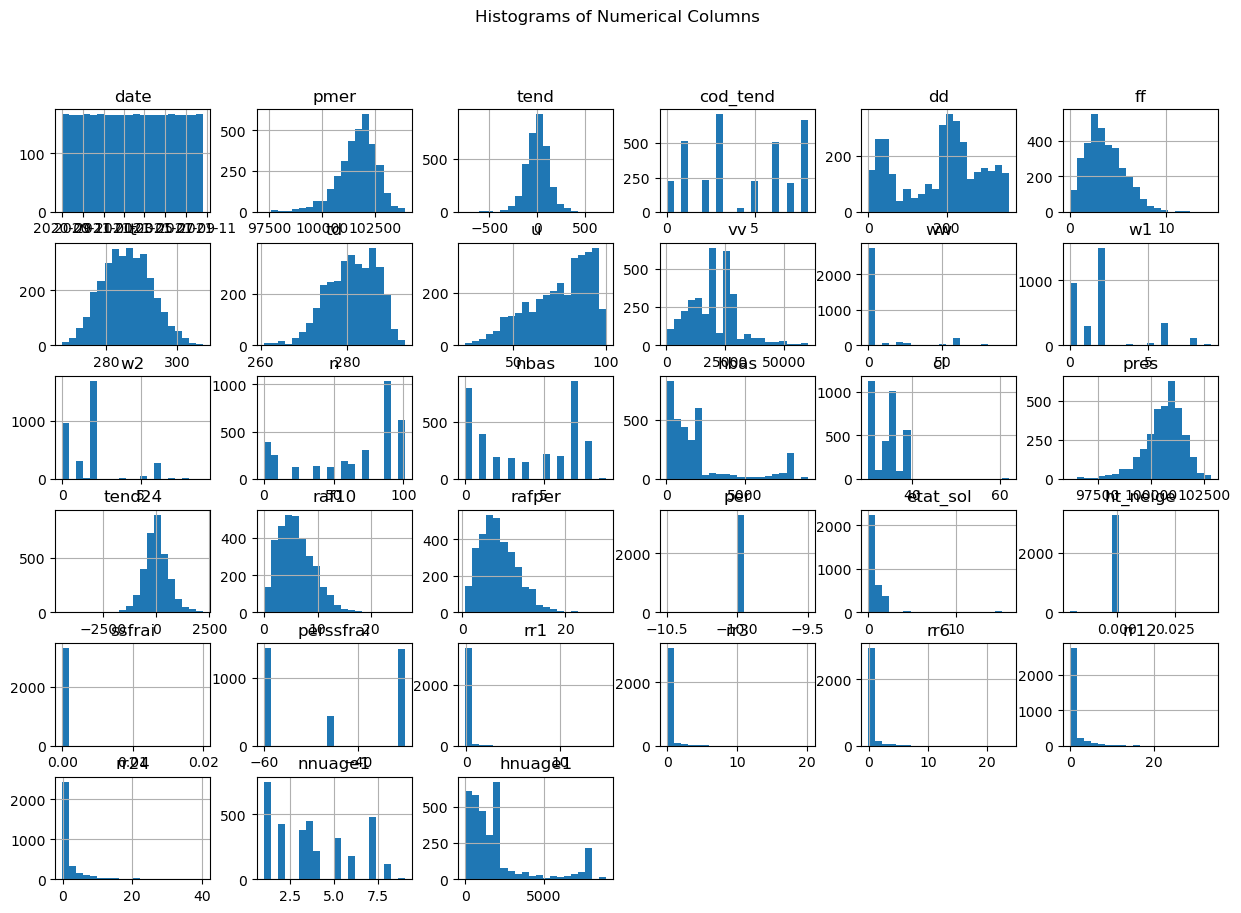

In [11]:
external_data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\241235050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = external_data.corr()


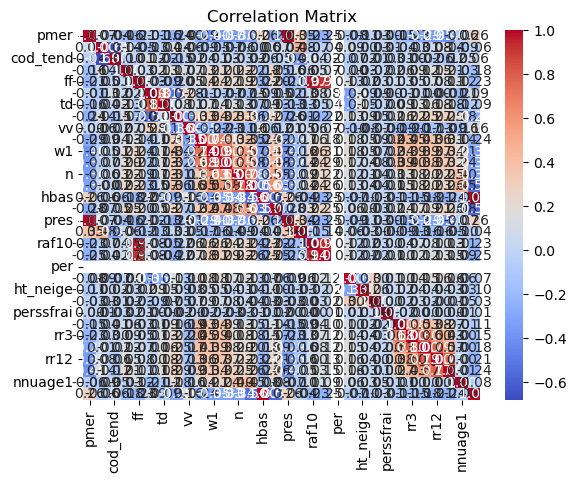

In [12]:
correlation_matrix = external_data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
data = pd.read_parquet(Path("data") / "train.parquet")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 48321 to 928462
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   counter_technical_id       455163 non-null  category      
 8   latitude                   455163 non-null  float64       
 9   longitude                  455163 non-null  float64       
 10  log_bike_count             455163 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), i

In [15]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3322 non-null   datetime64[ns]
 1   pmer       3322 non-null   int64         
 2   tend       3322 non-null   int64         
 3   cod_tend   3322 non-null   int64         
 4   dd         3322 non-null   int64         
 5   ff         3322 non-null   float64       
 6   t          3322 non-null   float64       
 7   td         3322 non-null   float64       
 8   u          3322 non-null   int64         
 9   vv         3322 non-null   int64         
 10  ww         3322 non-null   int64         
 11  w1         3322 non-null   float64       
 12  w2         3322 non-null   float64       
 13  n          3322 non-null   float64       
 14  nbas       3322 non-null   float64       
 15  hbas       3322 non-null   float64       
 16  cl         3322 non-null   float64       


In [16]:
# Sort both 'data' and 'external_data' dataframes by the 'date' column
data_sorted = data.sort_values(by="date")
external_data_sorted = external_data.sort_values(by="date")

# Assuming you want to merge based on a 1-hour time difference
merged_data = pd.merge_asof(
    data_sorted,
    external_data_sorted,
    on="date",
    direction="backward",
    tolerance=pd.Timedelta("6H"),
)

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 0 to 455162
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   counter_technical_id       455163 non-null  category      
 8   latitude                   455163 non-null  float64       
 9   longitude                  455163 non-null  float64       
 10  log_bike_count             455163 non-null  float64       
 11  pmer                       455163 non-null  int64   

Cyclist Data Columns:

counter_id, counter_name, site_id, site_name, bike_count, date, counter_installation_date, counter_technical_id, latitude, longitude, log_bike_count.

Weather Data Columns:

pmer, tend, cod_tend, dd, ff, t, td, u, vv, ww, w1, w2, n, nbas, hbas, cl, pres, tend24, raf10, rafper, per, etat_sol, ht_neige, ssfrai, perssfrai, rr1, rr3, rr6, rr12, rr24, nnuage1, hnuage1.

In [18]:
# Drop the 'bike_count' column from the feature set
feature_set = merged_data.drop("bike_count", axis=1)

# Display the updated feature set
print(feature_set.head())

            counter_id                     counter_name    site_id  \
0  100056332-104056332              Pont de Bercy SO-NE  100056332   
1  100047547-104047547         6 rue Julia Bartet NE-SO  100047547   
2  100047547-103047547         6 rue Julia Bartet SO-NE  100047547   
3  100057380-103057380         Totem Cours la Reine O-E  100057380   
4  100047548-103047548  Face au 25 quai de l'Oise NE-SO  100047548   

                   site_name                date counter_installation_date  \
0              Pont de Bercy 2020-09-01 01:00:00                2019-12-11   
1         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
2         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
3       Totem Cours la Reine 2020-09-01 01:00:00                2020-02-11   
4  Face au 25 quai de l'Oise 2020-09-01 01:00:00                2018-11-28   

  counter_technical_id  latitude  longitude  log_bike_count  ...  ht_neige  \
0          Y2H19070378  48.83848

In [19]:
# Convert the 'date' column to datetime objects
feature_set["date"] = pd.to_datetime(feature_set["date"])

# Extract datetime features
feature_set["day_of_week"] = feature_set["date"].dt.dayofweek
feature_set["month"] = feature_set["date"].dt.month
feature_set["hour"] = feature_set["date"].dt.hour

# Display the updated feature set
print(feature_set.head())

            counter_id                     counter_name    site_id  \
0  100056332-104056332              Pont de Bercy SO-NE  100056332   
1  100047547-104047547         6 rue Julia Bartet NE-SO  100047547   
2  100047547-103047547         6 rue Julia Bartet SO-NE  100047547   
3  100057380-103057380         Totem Cours la Reine O-E  100057380   
4  100047548-103047548  Face au 25 quai de l'Oise NE-SO  100047548   

                   site_name                date counter_installation_date  \
0              Pont de Bercy 2020-09-01 01:00:00                2019-12-11   
1         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
2         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
3       Totem Cours la Reine 2020-09-01 01:00:00                2020-02-11   
4  Face au 25 quai de l'Oise 2020-09-01 01:00:00                2018-11-28   

  counter_technical_id  latitude  longitude  log_bike_count  ...  rr1  rr3  \
0          Y2H19070378  48.83848

In [20]:
lag_variables = ["pmer", "t", "ff", "u", "pres", "raf10", "rr1"]

In [21]:
for variable in lag_variables:
    for i in range(1, 4):  # Create lag features for the past 3 hours
        feature_set[f"{variable}_lag_{i}"] = feature_set[variable].shift(i)

In [22]:
feature_set["wind_x"] = feature_set["ff"] * \
    np.cos(np.radians(feature_set["dd"]))
feature_set["wind_y"] = feature_set["ff"] * \
    np.sin(np.radians(feature_set["dd"]))

# Display the updated feature_set
print(feature_set.head())

            counter_id                     counter_name    site_id  \
0  100056332-104056332              Pont de Bercy SO-NE  100056332   
1  100047547-104047547         6 rue Julia Bartet NE-SO  100047547   
2  100047547-103047547         6 rue Julia Bartet SO-NE  100047547   
3  100057380-103057380         Totem Cours la Reine O-E  100057380   
4  100047548-103047548  Face au 25 quai de l'Oise NE-SO  100047548   

                   site_name                date counter_installation_date  \
0              Pont de Bercy 2020-09-01 01:00:00                2019-12-11   
1         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
2         6 rue Julia Bartet 2020-09-01 01:00:00                2018-11-28   
3       Totem Cours la Reine 2020-09-01 01:00:00                2020-02-11   
4  Face au 25 quai de l'Oise 2020-09-01 01:00:00                2018-11-28   

  counter_technical_id  latitude  longitude  log_bike_count  ...  pres_lag_2  \
0          Y2H19070378  48.838

In [23]:
feature_set["temp_humidity_interaction"] = feature_set["t"] * feature_set["u"]

In [24]:
feature_set["temp_lag_1"] = feature_set["t"].shift(1)

In [25]:
feature_set["cloud_wind_interaction"] = feature_set["cl"] * feature_set["ff"]

In [26]:
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 0 to 455162
Data columns (total 71 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   date                       455163 non-null  datetime64[ns]
 5   counter_installation_date  455163 non-null  datetime64[ns]
 6   counter_technical_id       455163 non-null  category      
 7   latitude                   455163 non-null  float64       
 8   longitude                  455163 non-null  float64       
 9   log_bike_count             455163 non-null  float64       
 10  pmer                       455163 non-null  int64         
 11  tend                       455163 non-null  int64   

In [27]:
# Create lag features for precipitation using precipitation over 1 hour
feature_set["precipitation_lag_1"] = feature_set["rr1"].shift(1)
feature_set["precipitation_lag_2"] = feature_set["rr1"].shift(2)

# Explore interactions with other weather variables
feature_set["interaction_precipitation_temperature"] = (
    feature_set["rr1"] * feature_set["t"]
)

In [28]:
# Calculate the age of the bike counter since installation
feature_set["counter_age"] = (
    feature_set["date"] - feature_set["counter_installation_date"]
).dt.days

In [29]:
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 0 to 455162
Data columns (total 75 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   counter_id                             455163 non-null  category      
 1   counter_name                           455163 non-null  category      
 2   site_id                                455163 non-null  int64         
 3   site_name                              455163 non-null  category      
 4   date                                   455163 non-null  datetime64[ns]
 5   counter_installation_date              455163 non-null  datetime64[ns]
 6   counter_technical_id                   455163 non-null  category      
 7   latitude                               455163 non-null  float64       
 8   longitude                              455163 non-null  float64       
 9   log_bike_count                         455163 no

In [30]:
# Drop rows with NaN values
feature_set_cleaned = feature_set.dropna()

# Verify the result
feature_set_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455160 entries, 3 to 455162
Data columns (total 75 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   counter_id                             455160 non-null  category      
 1   counter_name                           455160 non-null  category      
 2   site_id                                455160 non-null  int64         
 3   site_name                              455160 non-null  category      
 4   date                                   455160 non-null  datetime64[ns]
 5   counter_installation_date              455160 non-null  datetime64[ns]
 6   counter_technical_id                   455160 non-null  category      
 7   latitude                               455160 non-null  float64       
 8   longitude                              455160 non-null  float64       
 9   log_bike_count                         455160 no

In [31]:
print("Unique counts:")
print("counter_id:", feature_set_cleaned["counter_id"].nunique())
print("counter_name:", feature_set_cleaned["counter_name"].nunique())
print("site_id:", feature_set_cleaned["site_id"].nunique())
print("site_name:", feature_set_cleaned["site_name"].nunique())
print("counter_technical_id:",
      feature_set_cleaned["counter_technical_id"].nunique())

Unique counts:
counter_id: 56
counter_name: 56
site_id: 30
site_name: 30
counter_technical_id: 30


In [ ]:
velib = pd.read_csv("data/station-velib.csv", sep=";")

In [ ]:
velib["geo_point_2d"] = velib["geo_point_2d"].str.split(",")
velib["latitude"] = velib["geo_point_2d"].apply(lambda x: float(x[0]))
velib["longitude"] = velib["geo_point_2d"].apply(lambda x: float(x[1]))

In [ ]:
velib.to_csv("data/velib_cleaned.csv", index=False)

In [32]:
velib = pd.read_csv("data/velib_cleaned.csv")

In [33]:
velib_stations = list(zip(velib["latitude"], velib["longitude"]))

In [35]:
from scipy.spatial import cKDTree

In [36]:
feature_set_coords = feature_set_cleaned[["latitude", "longitude"]]

In [37]:
velib["latitude"] = pd.to_numeric(velib["latitude"])
velib["longitude"] = pd.to_numeric(velib["longitude"])

In [38]:
velib_tree = cKDTree(velib[["latitude", "longitude"]].values)

In [39]:
distances, indices = velib_tree.query(feature_set_coords, k=1)

In [40]:
feature_set_cleaned["distance_to_nearest_velib"] = distances

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\3180311223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_set_cleaned["distance_to_nearest_velib"] = distances


In [41]:
feature_set_cleaned.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,...,wind_x,wind_y,temp_humidity_interaction,temp_lag_1,cloud_wind_interaction,precipitation_lag_1,precipitation_lag_2,interaction_precipitation_temperature,counter_age,distance_to_nearest_velib
3,100057380-103057380,Totem Cours la Reine O-E,100057380,Totem Cours la Reine,2020-09-01 01:00:00,2020-02-11,YTH19111509,48.86462,2.31444,0.000000,...,1.503508,-0.547232,23145.75,285.75,48.0,0.0,0.0,0.0,203,0.045046
4,100047548-103047548,Face au 25 quai de l'Oise NE-SO,100047548,Face au 25 quai de l'Oise,2020-09-01 01:00:00,2018-11-28,Y2H18086324,48.89141,2.38482,1.098612,...,1.503508,-0.547232,23145.75,285.75,48.0,0.0,0.0,0.0,643,0.111522
5,100047548-104047548,Face au 25 quai de l'Oise SO-NE,100047548,Face au 25 quai de l'Oise,2020-09-01 01:00:00,2018-11-28,Y2H18086324,48.89141,2.38482,0.000000,...,1.503508,-0.547232,23145.75,285.75,48.0,0.0,0.0,0.0,643,0.111522
6,100057380-104057380,Totem Cours la Reine E-O,100057380,Totem Cours la Reine,2020-09-01 01:00:00,2020-02-11,YTH19111509,48.86462,2.31444,1.098612,...,1.503508,-0.547232,23145.75,285.75,48.0,0.0,0.0,0.0,203,0.045046
7,100057445-103057445,Totem 73 boulevard de Sébastopol N-S,100057445,Totem 73 boulevard de Sébastopol,2020-09-01 01:00:00,2020-02-11,YTH19111510,48.86377,2.35096,1.098612,...,1.503508,-0.547232,23145.75,285.75,48.0,0.0,0.0,0.0,203,0.067840


In [42]:
feature_set_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455160 entries, 3 to 455162
Data columns (total 76 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   counter_id                             455160 non-null  category      
 1   counter_name                           455160 non-null  category      
 2   site_id                                455160 non-null  int64         
 3   site_name                              455160 non-null  category      
 4   date                                   455160 non-null  datetime64[ns]
 5   counter_installation_date              455160 non-null  datetime64[ns]
 6   counter_technical_id                   455160 non-null  category      
 7   latitude                               455160 non-null  float64       
 8   longitude                              455160 non-null  float64       
 9   log_bike_count                         455160 no

In [45]:
feature_set_cleaned["year"] = feature_set_cleaned["date"].dt.year

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\3849795469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_set_cleaned["year"] = feature_set_cleaned["date"].dt.year


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
numerical_features = [
    "latitude",
    "longitude",
    "pmer",
    "tend",
    "t",
    "td",
    "u",
    "vv",
    "n",
    "nbas",
    "hbas",
    "pres",
    "tend24",
    "raf10",
    "rafper",
    "ht_neige",
    "ssfrai",
    "rr1",
    "rr3",
    "rr6",
    "rr12",
    "rr24",
    "pmer_lag_1",
    "pmer_lag_2",
    "pmer_lag_3",
    "t_lag_1",
    "t_lag_2",
    "t_lag_3",
    "ff_lag_1",
    "ff_lag_2",
    "ff_lag_3",
    "u_lag_1",
    "u_lag_2",
    "u_lag_3",
    "pres_lag_1",
    "pres_lag_2",
    "pres_lag_3",
    "raf10_lag_1",
    "raf10_lag_2",
    "raf10_lag_3",
    "rr1_lag_1",
    "rr1_lag_2",
    "rr1_lag_3",
    "wind_x",
    "wind_y",
    "temp_humidity_interaction",
    "temp_lag_1",
    "cloud_wind_interaction",
    "precipitation_lag_1",
    "precipitation_lag_2",
    "interaction_precipitation_temperature",
    "counter_age",
    "distance_to_nearest_velib",
]

In [49]:
categorical_features = [
    "counter_name",
    "site_name",
    "counter_technical_id",
    "cod_tend",
    "ww",
    "etat_sol",
    "day_of_week",
    "month",
    "hour",
    "year",
]

selected_features = numerical_features + categorical_features + ["log_bike_count"]

In [50]:
df_final = feature_set_cleaned[selected_features].copy()

In [51]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
model = RandomForestRegressor(n_jobs=-1)

In [ ]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

In [ ]:
df_final_subset = df_final.sample(frac=0.1, random_state=42)

In [ ]:
X = df_final_subset.drop("log_bike_count", axis=1)
y = df_final_subset["log_bike_count"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(f"Train: n_samples={X_train.shape[0]}")
print(f"Test: n_samples={X_test.shape[0]}")

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

In [ ]:
rf_model = pipeline.named_steps["model"]

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(
    {
        "Feature": numerical_features
        + list(
            pipeline.named_steps["preprocessor"]
            .named_transformers_["cat"]
            .get_feature_names_out(categorical_features)
        ),
        "Importance": feature_importances,
    }
)

In [ ]:
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

In [ ]:
print(feature_importance_df)

In [ ]:
# Save feature importances to a CSV file
feature_importance_df.to_csv("feature_importance.csv", index=False)

features to keep:
1. hour- categorical
2. counter age- numerical
3. counter name- categorical
4. counter_technical_id- categorical
5. site_name- categorical
6. day_of_week- categorical
7. t- numerical
8. t_lag 1 to 3- numerical
9. tend24- numerical
10. distance_to_nearest_velib- numerical
11. td- numerical
12. temp_humidity_interaction- numerical
13. wind_x- numerical
14. wind_y- numerical
15. tend- numerical
16. u_lag 1 to 3- numerical
17. hbas- numerical
18. u- numerical
19. rr24- numerical
20. rafper- numerical
21. n- numerical
22. cloud_wind_interaction- numerical
23. nbas- numerical
24. rr12- numerical
25. etat_sol- categorical
26. rr6- numerical
27. pres- numerical
28. pres_lag 1 to 3- numerical
29. raf10_lag 1 to 3- numerical
30. ff_lag 1 to 3- numerical
31. pmer- numerical
32. pmer lag 1 to 3- numerical
33. rr3- numerical
34. raf10- numerical

In [73]:
# Updated numerical and categorical features for XGBoost
numerical_features_xgb = [
    "counter_age",
    "t",
    "t_lag_1",
    "t_lag_2",
    "t_lag_3",
    "tend24",
    "distance_to_nearest_velib",
    "td",
    "temp_humidity_interaction",
    "wind_x",
    "wind_y",
    "tend",
    "u_lag_1",
    "u_lag_2",
    "u_lag_3",
    "hbas",
    "u",
    "rr24",
    "rafper",
    "n",
    "cloud_wind_interaction",
    "nbas",
    "rr12",
    "rr6",
    "pres",
    "pres_lag_1",
    "pres_lag_2",
    "pres_lag_3",
    "raf10_lag_1",
    "raf10_lag_2",
    "raf10_lag_3",
    "ff_lag_1",
    "ff_lag_2",
    "ff_lag_3",
    "pmer",
    "pmer_lag_1",
    "pmer_lag_2",
    "pmer_lag_3",
    "rr3",
    "raf10",
]

categorical_features_xgb = [
    "hour",
    "counter_name",
    "counter_technical_id",
    "site_name",
    "day_of_week",
    "etat_sol",
]

In [74]:
# Selecting features for XGBoost
selected_features_xgb = (
    numerical_features_xgb + categorical_features_xgb + ["log_bike_count"]
)
df_xgb = df_final[selected_features_xgb].copy()

In [75]:
df_xgb["hour"] = df_xgb["hour"].astype("category")
df_xgb["day_of_week"] = df_xgb["day_of_week"].astype("category")
df_xgb["etat_sol"] = df_xgb["etat_sol"].astype("category")

In [77]:
X_xgb = df_xgb.drop("log_bike_count", axis=1)
y_xgb = df_xgb["log_bike_count"]

In [115]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb, y_xgb, test_size=0.2, random_state=42
)

In [116]:
from xgboost import XGBRegressor

In [117]:
reg = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)

In [118]:
reg.fit(X_train_xgb, y_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
# Make predictions on the test set
y_pred_xgb = reg.predict(X_test_xgb)

In [120]:
rmse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")

Root Mean Squared Error (RMSE): 0.41107727993407045


In [124]:
import joblib

# Assuming 'reg' is your trained XGBoost model
joblib.dump(reg, "XGBoost_model.joblib")

['XGBoost_model.joblib']

In [125]:
df_test = pd.read_parquet("data/test.parquet")

In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 56474 to 929187
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 41608 non-null  category      
 1   counter_name               41608 non-null  category      
 2   site_id                    41608 non-null  int64         
 3   site_name                  41608 non-null  category      
 4   bike_count                 41608 non-null  float64       
 5   date                       41608 non-null  datetime64[ns]
 6   counter_installation_date  41608 non-null  datetime64[ns]
 7   counter_technical_id       41608 non-null  category      
 8   latitude                   41608 non-null  float64       
 9   longitude                  41608 non-null  float64       
 10  log_bike_count             41608 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), int64(1)
memory

In [127]:
df_test_sorted = df_test.sort_values(by="date")

In [128]:
merged_df_test = pd.merge_asof(
    df_test_sorted,
    external_data_sorted,
    on="date",
    direction="backward",
    tolerance=pd.Timedelta("6H"),
)

In [131]:
feature_set_test = merged_df_test.drop("bike_count", axis=1)

            counter_id                          counter_name    site_id  \
0  100057380-103057380              Totem Cours la Reine O-E  100057380   
1  100057445-103057445  Totem 73 boulevard de Sébastopol N-S  100057445   
2  100056334-103056334                  38 rue Turbigo NE-SO  100056334   
3         100056223-SC                Pont des Invalides N-S  100056223   
4  100056335-104056335                      Quai d'Orsay E-O  100056335   

                          site_name                date  \
0              Totem Cours la Reine 2021-08-10 01:00:00   
1  Totem 73 boulevard de Sébastopol 2021-08-10 01:00:00   
2                    38 rue Turbigo 2021-08-10 01:00:00   
3            Pont des Invalides N-S 2021-08-10 01:00:00   
4                      Quai d'Orsay 2021-08-10 01:00:00   

  counter_installation_date counter_technical_id  latitude  longitude  \
0                2020-02-11          YTH19111509  48.86462   2.314440   
1                2020-02-11          YTH19111510

In [132]:
feature_set_test["date"] = pd.to_datetime(feature_set_test["date"])
feature_set_test["day_of_week"] = feature_set_test["date"].dt.dayofweek
feature_set_test["month"] = feature_set_test["date"].dt.month
feature_set_test["hour"] = feature_set_test["date"].dt.hour

In [133]:
lag_variables = ["pmer", "t", "ff", "u", "pres", "raf10", "rr1"]

In [134]:
for variable in lag_variables:
    for i in range(1, 4):  # Create lag features for the past 3 hours
        feature_set_test[f"{variable}_lag_{i}"] = feature_set_test[variable].shift(i)

In [137]:
feature_set_test["wind_x"] = feature_set_test["ff"] * np.cos(
    np.radians(feature_set_test["dd"])
)
feature_set_test["wind_y"] = feature_set_test["ff"] * np.sin(
    np.radians(feature_set_test["dd"])
)

In [138]:
feature_set_test["temp_humidity_interaction"] = (
    feature_set_test["t"] * feature_set_test["u"]
)

In [139]:
feature_set_test["temp_lag_1"] = feature_set_test["t"].shift(1)

In [140]:
feature_set_test["cloud_wind_interaction"] = (
    feature_set_test["cl"] * feature_set_test["ff"]
)

In [141]:
feature_set_test["precipitation_lag_1"] = feature_set_test["rr1"].shift(1)
feature_set_test["precipitation_lag_2"] = feature_set_test["rr1"].shift(2)

In [142]:
feature_set_test["interaction_precipitation_temperature"] = (
    feature_set_test["rr1"] * feature_set_test["t"]
)

In [144]:
feature_set_test["counter_age"] = (
    feature_set_test["date"] - feature_set_test["counter_installation_date"]
).dt.days

In [145]:
feature_set_test_cleaned = feature_set_test.dropna()

In [147]:
velib = pd.read_csv("data/velib_cleaned.csv")

In [148]:
velib_stations = list(zip(velib["latitude"], velib["longitude"]))
feature_set_test_coords = feature_set_test_cleaned[["latitude", "longitude"]]

In [149]:
velib["latitude"] = pd.to_numeric(velib["latitude"])
velib["longitude"] = pd.to_numeric(velib["longitude"])

In [150]:
velib_tree = cKDTree(velib[["latitude", "longitude"]].values)

In [151]:
distances, indices = velib_tree.query(feature_set_test_coords, k=1)

In [152]:
feature_set_test_cleaned["distance_to_nearest_velib"] = distances

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\3705545618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_set_test_cleaned["distance_to_nearest_velib"] = distances


In [153]:
feature_set_test_cleaned["year"] = feature_set_test_cleaned["date"].dt.year

C:\Users\ameya\AppData\Local\Temp\ipykernel_11160\1847020780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_set_test_cleaned["year"] = feature_set_test_cleaned["date"].dt.year


In [161]:
numerical_features_xgb = [
    "counter_age",
    "t",
    "t_lag_1",
    "t_lag_2",
    "t_lag_3",
    "tend24",
    "distance_to_nearest_velib",
    "td",
    "temp_humidity_interaction",
    "wind_x",
    "wind_y",
    "tend",
    "u_lag_1",
    "u_lag_2",
    "u_lag_3",
    "hbas",
    "u",
    "rr24",
    "rafper",
    "n",
    "cloud_wind_interaction",
    "nbas",
    "rr12",
    "rr6",
    "pres",
    "pres_lag_1",
    "pres_lag_2",
    "pres_lag_3",
    "raf10_lag_1",
    "raf10_lag_2",
    "raf10_lag_3",
    "ff_lag_1",
    "ff_lag_2",
    "ff_lag_3",
    "pmer",
    "pmer_lag_1",
    "pmer_lag_2",
    "pmer_lag_3",
    "rr3",
    "raf10",
]

categorical_features_xgb = [
    "hour",
    "counter_name",
    "counter_technical_id",
    "site_name",
    "day_of_week",
    "etat_sol",
]

selected_features_xgb = (
    numerical_features_xgb + categorical_features_xgb + ["log_bike_count"]
)

In [162]:
df_test_xgb = feature_set_test_cleaned[selected_features_xgb].copy()

In [165]:
df_test_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41605 entries, 3 to 41607
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   counter_age                41605 non-null  int64   
 1   t                          41605 non-null  float64 
 2   t_lag_1                    41605 non-null  float64 
 3   t_lag_2                    41605 non-null  float64 
 4   t_lag_3                    41605 non-null  float64 
 5   tend24                     41605 non-null  float64 
 6   distance_to_nearest_velib  41605 non-null  float64 
 7   td                         41605 non-null  float64 
 8   temp_humidity_interaction  41605 non-null  float64 
 9   wind_x                     41605 non-null  float64 
 10  wind_y                     41605 non-null  float64 
 11  tend                       41605 non-null  int64   
 12  u_lag_1                    41605 non-null  float64 
 13  u_lag_2                    4160

In [164]:
df_test_xgb["hour"] = df_test_xgb["hour"].astype("category")
df_test_xgb["day_of_week"] = df_test_xgb["day_of_week"].astype("category")
df_test_xgb["etat_sol"] = df_test_xgb["etat_sol"].astype("category")

In [166]:
X_xgb_test = df_test_xgb.drop("log_bike_count", axis=1)
y_xgb_test = df_test_xgb["log_bike_count"]

In [167]:
y_xgb_pred = reg.predict(X_xgb_test)

In [168]:
rmse_xgb_test = mean_squared_error(y_xgb_test, y_xgb_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")

Root Mean Squared Error (RMSE): 1.4353614330166964
